# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#set up list
city_data = []

print("Beginning Data Retrieval ")
print("-----------------------------")

record_count = 1
set_count = 1

# For each city name in cities list, do below things...
for i, city in enumerate(cities):
    if (i%50 == 0 and i>=50):
        set_count += 1
        record_count = 0
        time.sleep(60)
        
    #another way: city_url = query_url + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count += 1
    
    
    try:
        response = requests.get(query_url + city).json()
        city_lat= response["coord"]["lat"]
        city_lng= response["coord"]["lon"]  
        cloudiness= response["clouds"]["all"]
        country= response["sys"]["country"]
        date= response["dt"]
        humidity= response["main"]["humidity"]
        max_temp =response['main']['temp_max']
        wind_speed= response["wind"]["speed"]
        
        city_data.append({"City":city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | honningsvag
Processing Record 2 of Set 1 | lloydminster
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | tautira
Processing Record 6 of Set 1 | sakakah
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | kuching
Processing Record 10 of Set 1 | tiznit
Processing Record 11 of Set 1 | kabinda
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | ituni
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | san luis
Processing Record 18 of Set 1 | sawakin
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | lusambo
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | rockport
Processing Record 37 of Set 4 | marcona
City not found. Skipping...
Processing Record 38 of Set 4 | nelson bay
Processing Record 39 of Set 4 | castro
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | tavda
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | kem
Processing Record 47 of Set 4 | yumen
Processing Record 48 of Set 4 | thongwa
Processing Record 49 of Set 4 | kaka
Processing Record 0 of Set 5 | norman wells
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | ampanihy
Processing Record 5 of Set 5 | bundaberg
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | lisala
Proces

Processing Record 28 of Set 8 | arawa
Processing Record 29 of Set 8 | waingapu
Processing Record 30 of Set 8 | hithadhoo
Processing Record 31 of Set 8 | prado
Processing Record 32 of Set 8 | songea
Processing Record 33 of Set 8 | kisiwani
Processing Record 34 of Set 8 | pohrebyshche
Processing Record 35 of Set 8 | kasongo-lunda
Processing Record 36 of Set 8 | bhag
Processing Record 37 of Set 8 | tessalit
Processing Record 38 of Set 8 | mbini
Processing Record 39 of Set 8 | primorsk
Processing Record 40 of Set 8 | otane
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | santiago del estero
Processing Record 43 of Set 8 | lere
Processing Record 44 of Set 8 | cabedelo
Processing Record 45 of Set 8 | babu
Processing Record 46 of Set 8 | alta floresta
Processing Record 47 of Set 8 | pochutla
Processing Record 48 of Set 8 | pueblo nuevo
Processing Record 49 of Set 8 | half moon bay
Processing Record 0 of Set 9 | meiningen
Processing Record 1 of Set 9 | katsuura
Processing

Processing Record 12 of Set 12 | tibati
Processing Record 13 of Set 12 | nantucket
Processing Record 14 of Set 12 | nishihara
Processing Record 15 of Set 12 | mchinji
Processing Record 16 of Set 12 | magaria
Processing Record 17 of Set 12 | cotui
Processing Record 18 of Set 12 | muhos
Processing Record 19 of Set 12 | pedra azul
Processing Record 20 of Set 12 | bambamarca
Processing Record 21 of Set 12 | mozarlandia
Processing Record 22 of Set 12 | odweyne
Processing Record 23 of Set 12 | kosmynino
Processing Record 24 of Set 12 | nalut
Processing Record 25 of Set 12 | scottsboro
Processing Record 26 of Set 12 | porto nacional
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | dabakala
Processing Record 29 of Set 12 | tocopilla
Processing Record 30 of Set 12 | craigieburn
Processing Record 31 of Set 12 | podosinovets
Processing Record 32 of Set 12 | luganville
Processing Record 33 of Set 12 | hovd
Processing Record 34 of Set 12 | pontes e lacerda
Processing Record 35

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,honningsvag,70.9821,25.9704,26.35,74,6,32.21,NO,1669254796
1,lloydminster,53.2835,-110.0016,28.62,80,0,14.97,CA,1669254796
2,luderitz,-26.6481,15.1594,59.45,80,0,11.70,NA,1669254796
3,busselton,-33.6500,115.3333,65.82,55,100,9.69,AU,1669254797
4,tautira,-17.7333,-149.1500,76.42,85,100,15.97,PF,1669254797


In [5]:
# Count data
city_df.count()

# Display the Data Frame
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.593283,17.123000,52.257282,75.371226,60.735346,7.566572,1.669255e+09
std,33.706408,90.599823,28.442579,19.478038,40.189444,6.215456,2.744987e+02
min,-54.800000,-175.200000,-40.810000,9.000000,0.000000,0.000000,1.669254e+09
25%,-7.062650,-64.322300,38.055000,65.000000,16.000000,3.090000,1.669255e+09
50%,24.687700,21.516700,61.090000,80.000000,75.000000,5.970000,1.669255e+09
75%,49.241050,100.664550,74.280000,91.000000,100.000000,10.035000,1.669255e+09
max,78.218600,179.316700,91.170000,100.000000,100.000000,46.980000,1.669256e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_city_df = city_df[city_df["Humidity"] >100].index
humid_city_df

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(humid_city_df, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,honningsvag,70.9821,25.9704,26.35,74,6,32.21,NO,1669254796
1,lloydminster,53.2835,-110.0016,28.62,80,0,14.97,CA,1669254796
2,luderitz,-26.6481,15.1594,59.45,80,0,11.70,NA,1669254796
3,busselton,-33.6500,115.3333,65.82,55,100,9.69,AU,1669254797
4,tautira,-17.7333,-149.1500,76.42,85,100,15.97,PF,1669254797


In [8]:
#save the data
clean_city_data.to_csv(output_data_file, index_label="City_ID")

In [9]:
#calling data back in
clean_city_data= pd.read_csv(output_data_file, index_col=0)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,honningsvag,70.9821,25.9704,26.35,74,6,32.21,NO,1669254796
1,lloydminster,53.2835,-110.0016,28.62,80,0,14.97,CA,1669254796
2,luderitz,-26.6481,15.1594,59.45,80,0,11.70,NaN,1669254796
3,busselton,-33.6500,115.3333,65.82,55,100,9.69,AU,1669254797
4,tautira,-17.7333,-149.1500,76.42,85,100,15.97,PF,1669254797


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
lats=clean_city_data['Lat']
max_temps=clean_city_data['Max Temp']
cloudiness=clean_city_data['Cloudiness']
wind_speed=clean_city_data['Wind Speed']

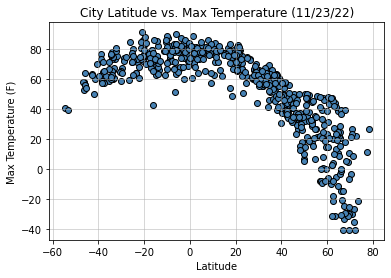

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(lats, max_temps, facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

NameError: name 'weather_dict' is not defined

## Latitude vs. Cloudiness Plot

In [1]:

# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

NameError: name 'plt' is not defined

## Latitude vs. Wind Speed Plot

In [2]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

NameError: name 'plt' is not defined

## Linear Regression

In [3]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y, title, text_coordinates):
#     print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates)
    plt.xlabel()
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
#     return line_eq

# # Define a fuction for annotating
# def annotate(line_eq, a, b):
#     plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [4]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
# southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

NameError: name 'clean_city_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [5]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Max Temp", (6,30))

# # Call an function #2
# annotate(equation, 0, 0)

# # Set a title
# plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# # Set xlabel
# plt.xlabel("Latitude")

# # Set ylabel
# plt.ylabel("Max Temp (F)")

# # Save the figure
# plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [6]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [7]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [8]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [9]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

NameError: name 'northern_hemisphere' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [10]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

NameError: name 'southern_hemisphere' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")